In [2]:
import skimage.io as io

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray,rgb2hsv
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
import numpy as np

from skimage.exposure import histogram
from matplotlib.pyplot import bar


In [3]:

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

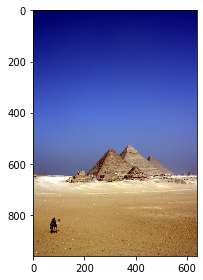

In [4]:
# Ex: imread and imshow 
pyramids = io.imread('pyramids.jpeg')
io.imshow(pyramids)
io.show()



In [5]:
# Use this function to show a histogram
# The image should be gray-scale and should range from 0 to 1
def showHist(histogramImg):
    plt.figure()
    bar(histogramImg[1]*255, histogramImg[0], width=0.8, align='center')


## TODO:
## Requirement #1 
-Read and print image 'coffee'  
-Show and print half of the  image
-----hint :use the attribute shape of numpy to get the image object dimensions

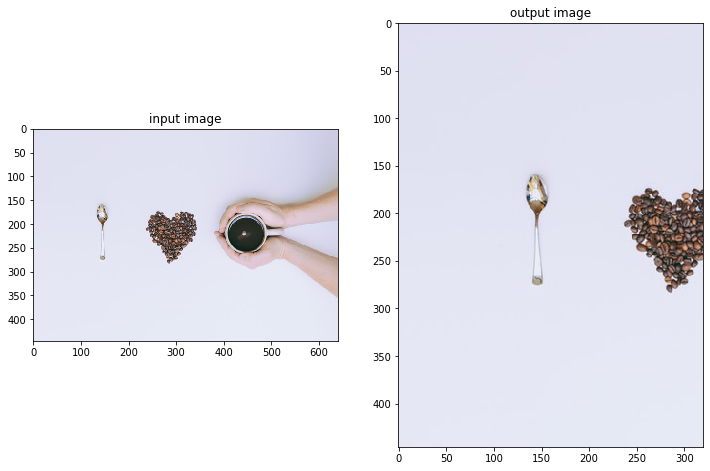

Shape of input image is  (446, 640, 3)
Shape of output image is  (446, 320, 3)


In [6]:
coffe_full = io.imread('coffee.jpeg');
coffe_halved = coffe_full[:,0:int(coffe_full.shape[1]/2),:]
#rendering i/o images
images_to_render = [coffe_full,coffe_halved]
titles=['input image','output image']
show_images(images_to_render,titles)

#printint i/o sizes
print('Shape of input image is ',coffe_full.shape)
print('Shape of output image is ',coffe_halved.shape)


## TODO:
## Requirement #2 
RGB to gray and HSV:
* Write a function 'gray_image' that takes an image as input , then
    -get the gray scale of the image, then
    -display original image and the gray scale one side by side (subplot).
    -hint: use rgb2gray to get the graylevel of the image
- test your function with the image 'pyramids'
    
* Write a function 'HSV_image' that takes an image as input , then
   -show the RGB image and the (3 channels of HSV image each channel in separated form ) one side by side (subplot).
   -hint: -use rgb2hsv (to get the hsv representation of the image).
          -To separately get the Hue, Saturation and Value channels, use hsvImg[:,:,X], 
           where hsvImg is the hsv representation of the image. 
           Hue is the first channel, Saturation is the second and value is the last channel.
- test your function for the images in HSV Folder. And comment on the results. 


In [7]:
def gray_image(image):
    
    #converting image to RGB
    image_gray = rgb2gray(image)
    
    #rendering i/o images
    images_to_render = [image,image_gray]
    titles=['input image','output image']
    show_images(images_to_render,titles)

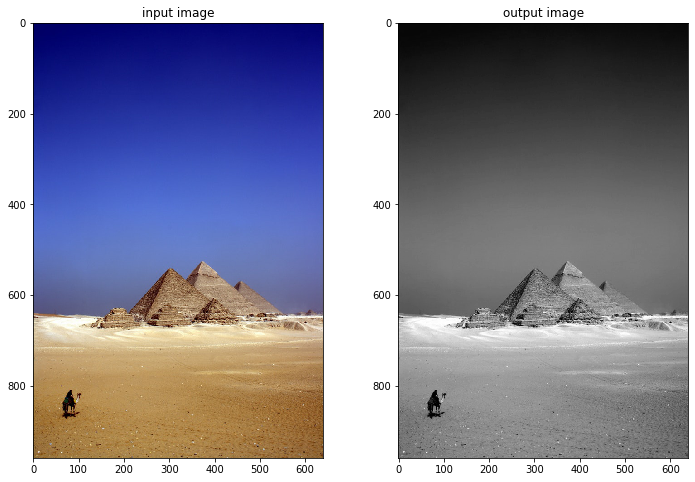

In [8]:
#testing gray_image function
gray_image(pyramids)

In [9]:
def HSV_image(path):
    image= io.imread(path)
    image_HSV = rgb2hsv(image)
    hue_channel = image_HSV[:,:,0]
    saturation_channel = image_HSV[:,:,1]
    value_channel = image_HSV[:,:,2]
    #rendering i/o images
    images_to_render = [image,hue_channel,saturation_channel,value_channel]
    titles=['Input Image','Hue Channel','Saturation Channel','Value Channel']
    show_images(images_to_render,titles)

/Users/naderabdalghani/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:271: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/Users/naderabdalghani/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:275: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]


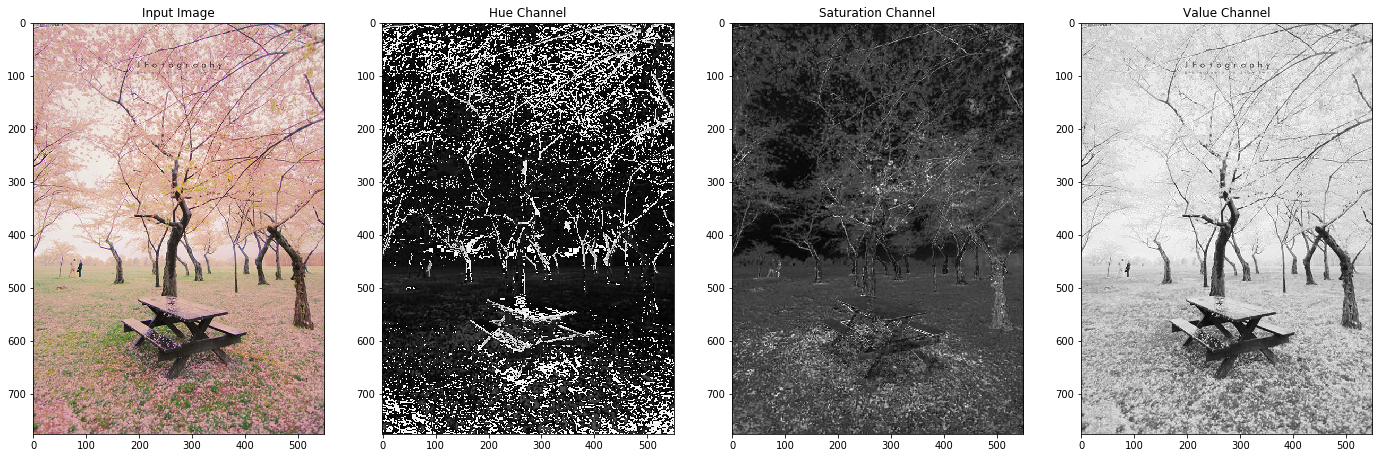

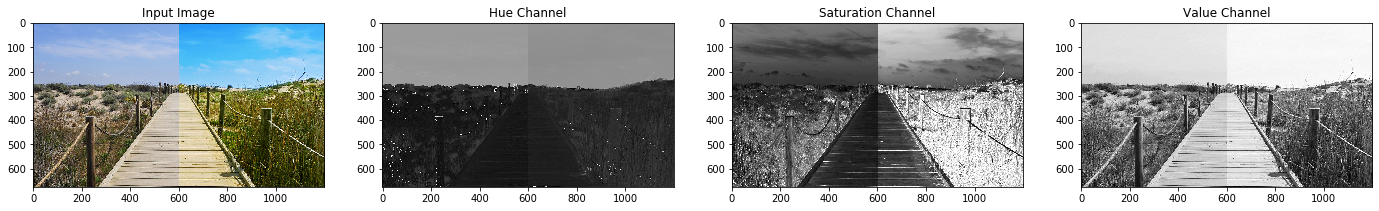

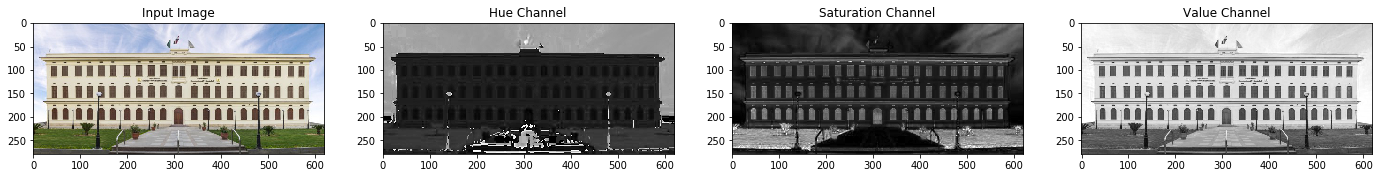

In [10]:
#testing HSV_image function
import os

image_names = os.listdir('./hsv')
for image_name in image_names:
    path = os.path.join('hsv',image_name)
    HSV_image(path)

# Comments about HSV function

### Common thing
all channel is in gray scale because its size is (l,w,1) so it's ploted in gray scale.

### First image
* **hue channel** : as we in image there are alot of purple color(dominant) in the image and hue channel represents the color of the image and purple value is close to magneta (5/6) which is high value  so all purple color is reflected into white (highest value).

* **saturation channel** : we see purple color not saturated enough so when it's ploted it takes a value close to black(lowest value), instead the grass is saturated so it takes a white color(higest value).

* **value channel**: we see purple color is so bright and value channel represent the brightness of color or light in the image (not accurate though) so purple color takes white color(highest value).

### Second Image
* **hue channel** : if we check value of hue, we will find that the green color of grass is not that high compared to (magenta) so it take color close to black. and we see that clearly in the bridge color,which has color close to  white color (hue=0), so its color is so black.

* **saturation channel** : we see the right side of the image, its color is saturated so right side takes higher value (white color) than left side.

* **value channel**: the right side of the image is brighter than its left side so it takes higher value(white color) than its left side.

### Third Image
* **hue channel** : we see hue of the building is low so it's translated into black.

* **saturation channel** : we see the building color is not saturated, which leads to dark color(low value).it is supposed to be yellow but it's very close to white.

* **value channel**: building brightness is very high, which leads to white color.



## Requirement 2 (Noise):
http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise

* For an image of your choice (the effect of noise must be obvious): 
    Read the image.
    Convert it to greyscale.
    Apply salt & pepper noise with 
    amount=0.05, 0.5 and 0.9
   
* From the other images. Recommend one image that won’t be greatly affected by the noise and state why.    
    


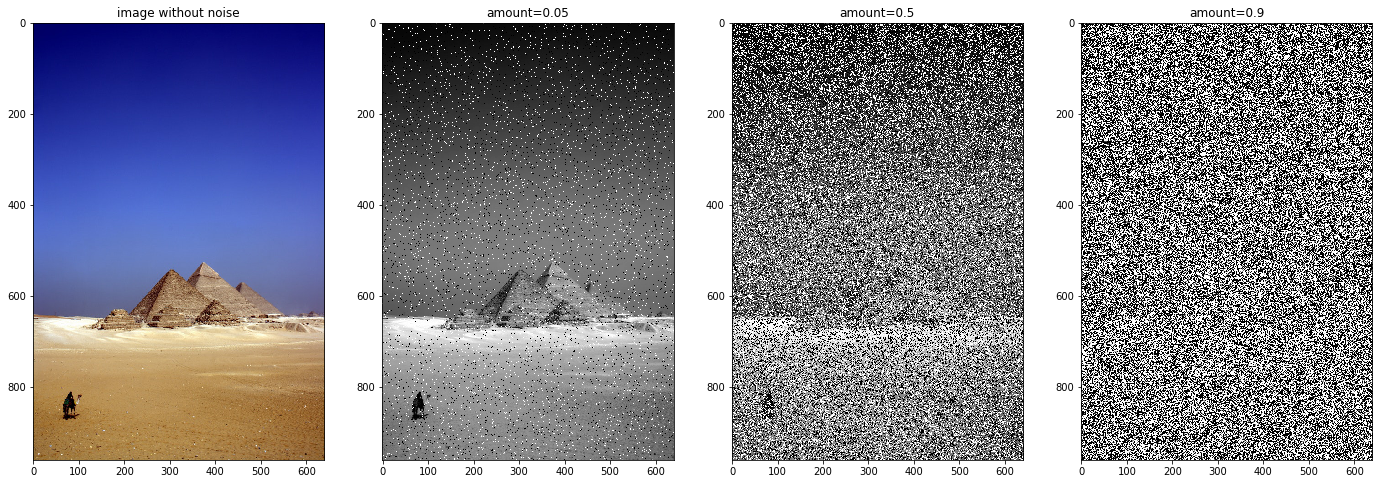

In [11]:
image_no_noise = io.imread('pyramids.jpeg')
image_gray = rgb2gray(image_no_noise)

#performing noise with different amounts 
image_noise_1=random_noise(image_gray,amount = 0.05,mode = 's&p')
image_noise_2=random_noise(image_gray,amount = 0.5,mode = 's&p')
image_noise_3=random_noise(image_gray,amount = 0.9,mode = 's&p')

#rendering i/o images
images_to_render = [image_no_noise,image_noise_1,image_noise_2,image_noise_3]
titles=['image without noise','amount=0.05','amount=0.5','amount=0.9']
show_images(images_to_render,titles)


### I recommend using **hsv/ex2.jpg** 
-because we first convert image into gray scale so it's values ranges from 0(black) to 255(white), and this image contains alot of details (alot of changes),not smooth, unlike **pyramids.jpeg**, which has blue smooth continuous color will give noise a place to occur.

**note** : as we increase amount of s&p, image is distorted.

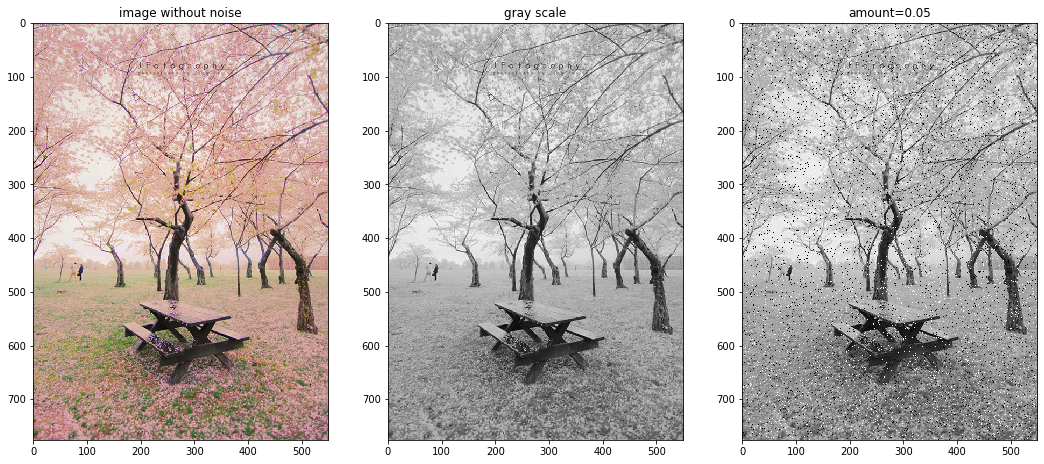

In [12]:
image_no_noise = io.imread('hsv/ex2.jpg')
image_gray = rgb2gray(image_no_noise)

#applying noise
image_noise=random_noise(image_gray,amount = 0.05,mode = 's&p')

#rendering i/o images
images_to_render = [image_no_noise,image_gray,image_noise]
titles=['image without noise','gray scale','amount=0.05']
show_images(images_to_render,titles)


## Requirement 3 (Histogram):

* For the given images ( in histogram folder): 
    Read the image.
    Apply histogram and show it.
Hint
    A) Use histogram (image) to get histogram. Try different values for nbins (256,64,8), What does it mean?
    B) and function(showHist) to draw it.
* Draw a grey-scale image that has uniform histogram 
same number of pixels for all intensity levels) using code only. Let the size of the image be 256x256.
use np.ones to draw image with ones.


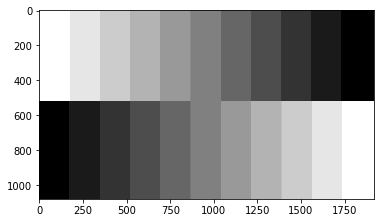

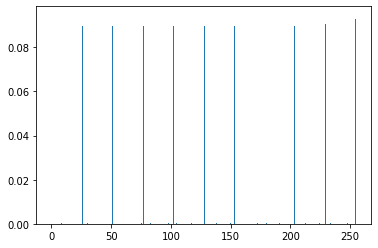

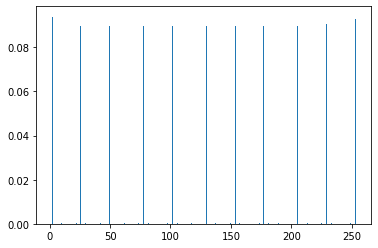

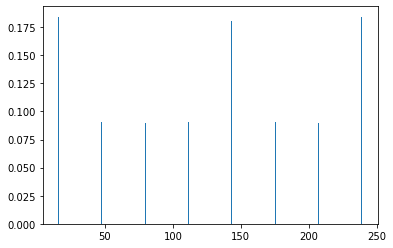

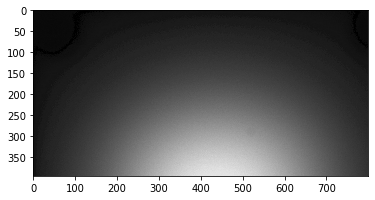

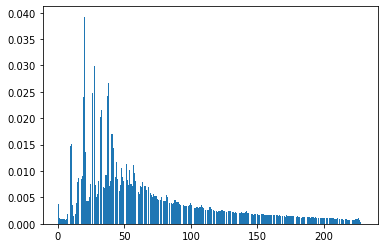

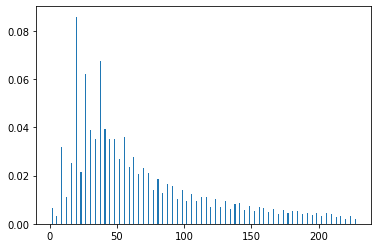

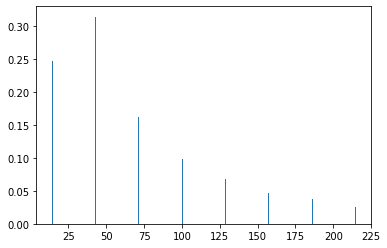

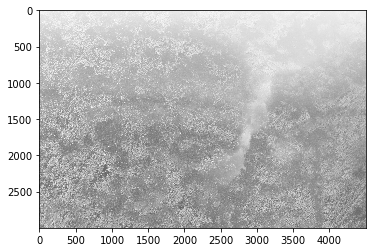

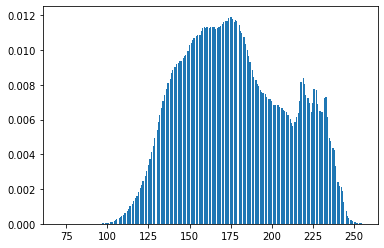

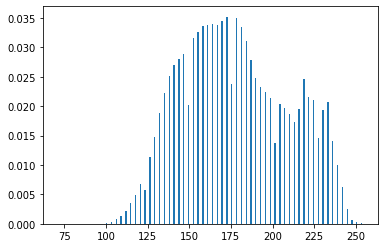

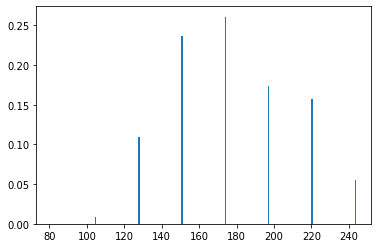

In [13]:
image_names = os.listdir('./histogram')
for image_name in image_names:
    path = os.path.join('histogram',image_name)
    image = io.imread(path)
    
    # input image
    plt.figure()
    plt.imshow(image)
    image_gray = rgb2gray(image)

    # nbins = 256
    image_hist_256 = histogram(image_gray,nbins=256,normalize=True)
    showHist(image_hist_256)
    
    # nbins = 64
    image_hist_64 = histogram(image_gray,nbins=64,normalize=True)
    showHist(image_hist_64)
    
    # nbins =8
    image_hist_8 = histogram(image_gray,nbins=8,normalize=True)
    showHist(image_hist_8)
    
    

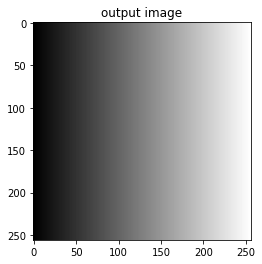

In [21]:
# output image with uniform histogram

#using vectorized code for better performance
output_image = np.remainder( np.arange(256*256),256 ).reshape(256,256).astype(np.uint8)

#rendering output
show_images([output_image],["output image"])

#ouput file
io.imsave('uniform_hist.jpg',output_image)

# Comments about Histogram

### **nbins**:
defines the number of gray-level, so histogram function will return **8** numbers for **nbins = 8**.So as we increase nbins we have more gray-levels in our histogram graph (smoother graph).

### grey-scale image
since image is 256x256 and we need uniform histogram so we need to have equal probabilities of color, which maps here to each pixel has 1 distinct color.